In [14]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Importing Files
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [16]:
#File Info
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None


,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [17]:
#Feature Selection and Renaming
df['emotion']=df['sentiment']
df.drop(columns=['tweet_id','sentiment'],inplace=True)
df.head()

,content,emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [18]:
#Text Cleaning
import neattext.functions as nfx
df['content']=df['content'].apply(nfx.remove_stopwords)    # Remove Stopwords
df['content']=df['content'].apply(nfx.remove_userhandles)    # Remove Userhandles
df['content']=df['content'].apply(nfx.remove_punctuations)    # Remove Punctuations
df['content']=df['content'].apply(nfx.remove_emojis)   # Remove emmojis 
df['content']=df['content'].apply(nfx.remove_special_characters)  # Remove special characters
df.head()

ModuleNotFoundError: No module named 'neattext'

In [19]:
#Checking Null Values
df.isnull().sum()

content    0
emotion    0
dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

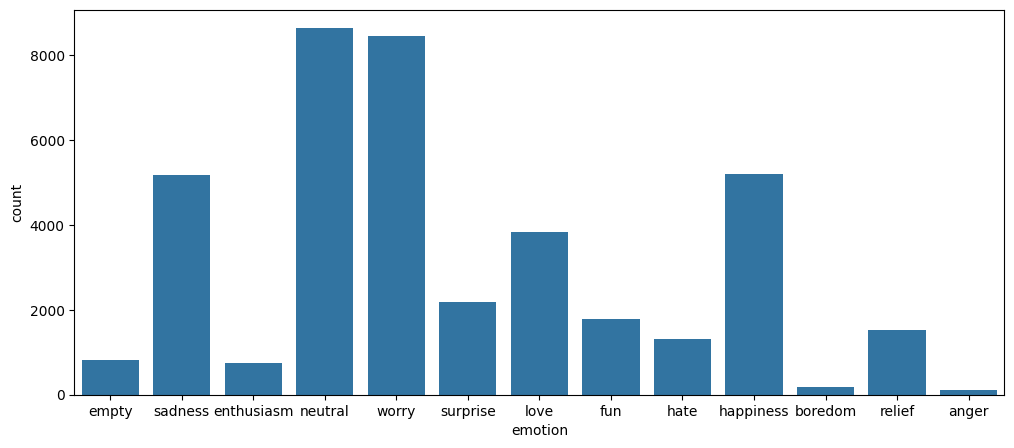

In [20]:
#Visualising all emotions
plt.figure(figsize=(12,5))
sns.countplot(x='emotion',data=df)

In [21]:
#Sentiment Analysis Function
from textblob import TextBlob
def sentiment_analysis(obj):
    text=TextBlob(obj)
    sentiment=text.sentiment.polarity
    if sentiment>0:
        return "Positive"
    elif sentiment<0:
        return "Negative"
    else:
        return "Neutral"


ModuleNotFoundError: No module named 'textblob'

In [22]:
sentiment_analysis("at funeral")

NameError: name 'sentiment_analysis' is not defined

In [23]:
#Sentiment Analysis
df['sentiment']=df['content'].apply(sentiment_analysis)
df.head()

NameError: name 'sentiment_analysis' is not defined

In [24]:
#Visualising emotions and sentiments
sns.catplot(x='emotion',hue='sentiment',data=df,kind='count',aspect=2)

ValueError: Could not interpret value `sentiment` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
# comparison of emotion vs sentiment
df.groupby(['emotion','sentiment']).size()

In [ ]:
sns.catplot(x='emotion',hue='sentiment',data=df, kind='count',aspect=1.5)

In [ ]:
#Keyword Extraction Function
from collections import Counter
def keyword_extract(obj,count=100):
    tokens=[tok for tok in obj.split()]
    common_t=Counter(tokens).most_common(count)
    return dict(common_t)

In [ ]:
#keyword extraction
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    mostcommon=Counter(tokens).most_common(num)
    return dict(mostcommon)

In [ ]:
#list of emotions
emotion_list=df['emotion'].unique().tolist()

In [ ]:
emotion_list

In [ ]:
love_list=df[df['emotion']=='love']['content'].tolist()

In [ ]:
#love tokens
love_docx=' '.join(love_list)

In [ ]:
love_docx

In [ ]:
keyword_love=keyword_extract(love_docx)

In [ ]:
keyword_love

In [ ]:
def plot_most_common_words(mydict):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()
    

In [ ]:
plot_most_common_words(keyword_love)

In [ ]:
#generating wword cloud
from wordcloud import WordCloud


In [ ]:
def plot_wordcloud(docx):
    mwc=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mwc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
plot_wordcloud(love_docx)

In [ ]:
# loading ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#splitting of dataset
from sklearn.model_selection import train_test_split

In [ ]:
Xfeatures=df['content']
ylabels=df['emotion']

In [ ]:
Xfeatures

In [ ]:
ylabels

In [ ]:
# vectorizer 
cv =CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=50)

In [ ]:
# Build model using naive bayes
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

In [ ]:
#checking accuracy
nv_model.score(X_test,y_test)

In [ ]:
y_pred_for_nv=nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

In [ ]:
# testing 
sample=["I love my country"]

In [ ]:
vect=cv.transform(sample).toarray()

In [ ]:
nv_model.predict(vect)

In [ ]:
# function to test
def predict(sample,model):
    vect=cv.transfrom(sample).toarray()
    prediction=model.predict(vect)
    print(prediction[0])

In [ ]:
vect=cv.transform(["i love my country"])
a=nv_model.predict(vect)
a[0]

In [ ]:
from flask import Flask,render_template,request,jsonify

app= Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def homepage():
    return render_template('index.html')

@app.route('/review', methods=['POST'])
def index():
    if (request.method == 'POST'):
        String = request.form['content']
        vect=cv.transform([String])
        a=nv_model.predict(vect)
        return render_template('result.html',result=a[0])
    
if __name__ == '__main__':
    app.run(host="0.0.0.0",port=8000)


In [ ]:
vect=cv.transform(["i love my country"])
a=nv_model.predict(vect)
a[0]